In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_10131363.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_10304478.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_1054527.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_10590091.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_1109992.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_11296953.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_12000629.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_12008383.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\angry\PrivateTest_12191716.jpg
C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test\ang

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
train_dir = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/train'
test_dir = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test'

In [4]:
num_train_folders = len([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])
num_test_folders = len([folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))])

print(f"Number of folders (classes) in the train directory: {num_train_folders}")
print(f"Number of folders (classes) in the test directory: {num_test_folders}")

Number of folders (classes) in the train directory: 7
Number of folders (classes) in the test directory: 7


In [5]:
def get_subfolders_and_image_counts(directory):
    subfolders = {}
    for subdir, dirs, files in os.walk(directory):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
    return subfolders

train_subfolders = get_subfolders_and_image_counts(train_dir)
test_subfolders = get_subfolders_and_image_counts(test_dir)

In [6]:
print("Training Subfolders and Image Counts:")
for folder, count in train_subfolders.items():
    print(f"{folder}: {count} images")

print("\nTest Subfolders and Image Counts:")
for folder, count in test_subfolders.items():
    print(f"{folder}: {count} images")

Training Subfolders and Image Counts:
angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images

Test Subfolders and Image Counts:
angry: 958 images
disgust: 111 images
fear: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprise: 831 images


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'] * 2,
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215, 831, 1024, 958, 1233, 1247, 111, 1774],
    'Dataset': ['Training'] * 7 + ['Test'] * 7
}

df = pd.DataFrame(data)

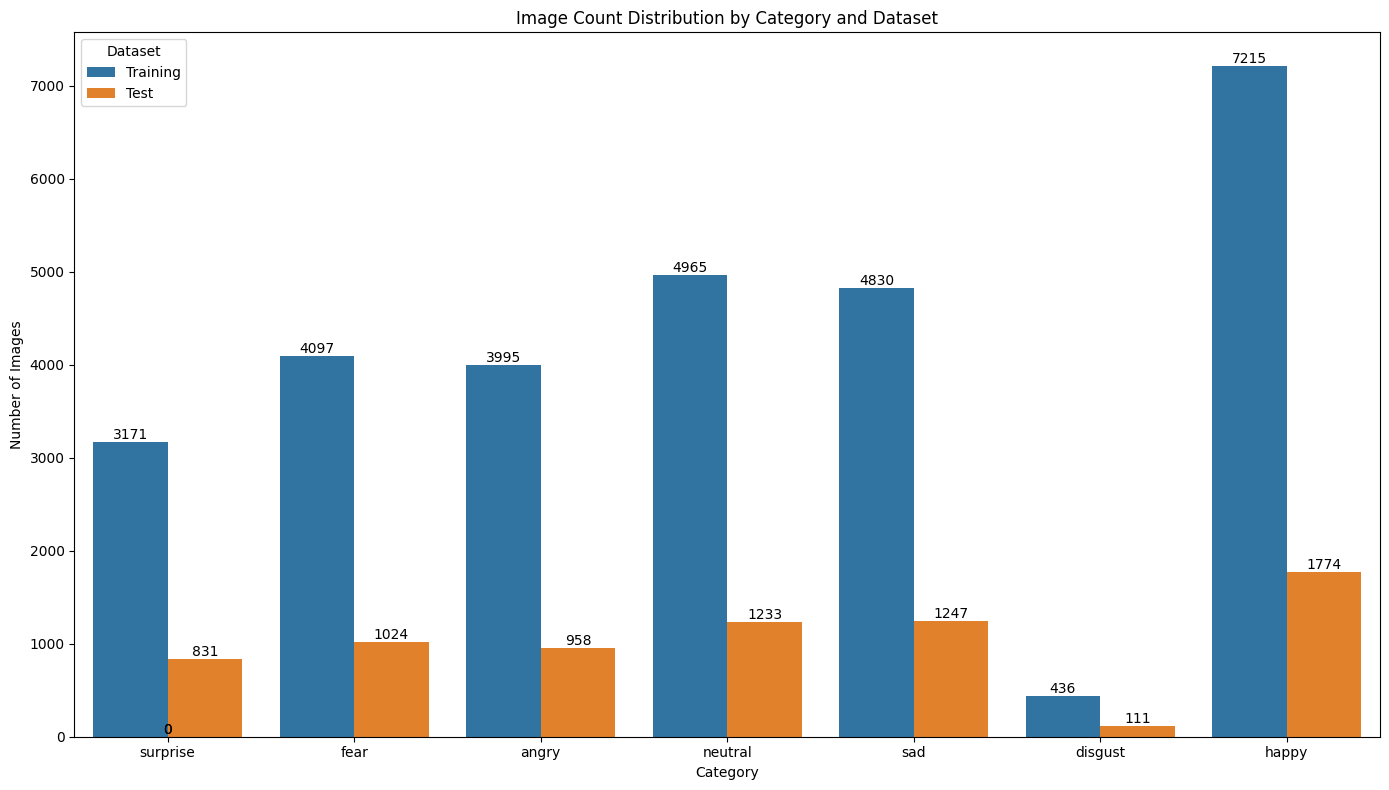

In [9]:
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='Category', y='Count', hue='Dataset', data=df)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='bottom', fontsize=10)

plt.title('Image Count Distribution by Category and Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.legend(title='Dataset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
train_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [3171, 4097, 3995, 4965, 4830, 436, 7215]
}

test_counts = {
    'Category': ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy'],
    'Count': [831, 1024, 958, 1233, 1247, 111, 1774]
}

df_train = pd.DataFrame(train_counts)
df_test = pd.DataFrame(test_counts)

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(
    labels=df_train['Category'],
    values=df_train['Count'],
    name='Training Dataset',
    hoverinfo='label+percent',
    title='Training Dataset Distribution'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=df_test['Category'],
    values=df_test['Count'],
    name='Test Dataset',
    hoverinfo='label+percent',
    title='Test Dataset Distribution'
), row=1, col=2)

fig.update_layout(title_text='Dataset Distribution', title_x=0.5)

fig.show()

In [12]:
total_train = df_train['Count'].sum()
total_test = df_test['Count'].sum()

In [13]:
df_train['Percentage'] = (df_train['Count'] / total_train) * 100
df_test['Percentage'] = (df_test['Count'] / total_test) * 100

print("Training Dataset Percentages:")
for _, row in df_train.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

print("\nTest Dataset Percentages:")
for _, row in df_test.iterrows():
    print(f"{row['Category'].capitalize()}: {row['Percentage']:.2f}%")

Training Dataset Percentages:
Surprise: 11.05%
Fear: 14.27%
Angry: 13.92%
Neutral: 17.29%
Sad: 16.82%
Disgust: 1.52%
Happy: 25.13%

Test Dataset Percentages:
Surprise: 11.58%
Fear: 14.27%
Angry: 13.35%
Neutral: 17.18%
Sad: 17.37%
Disgust: 1.55%
Happy: 24.71%


In [14]:
import cv2

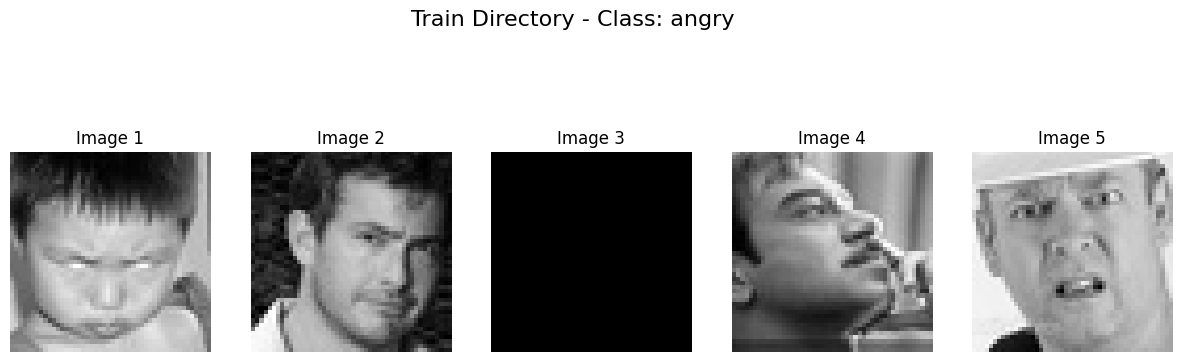

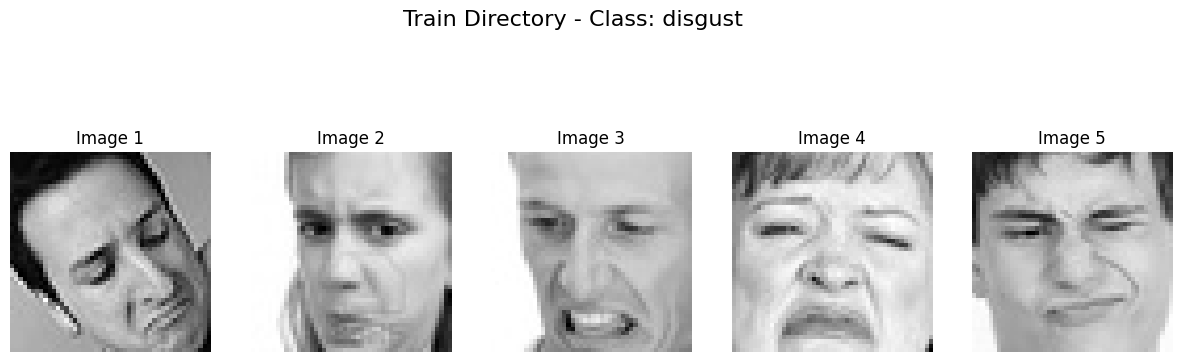

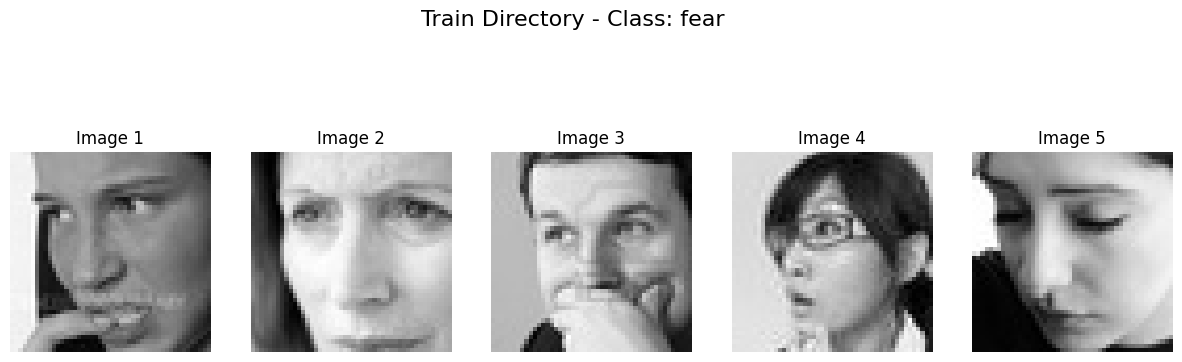

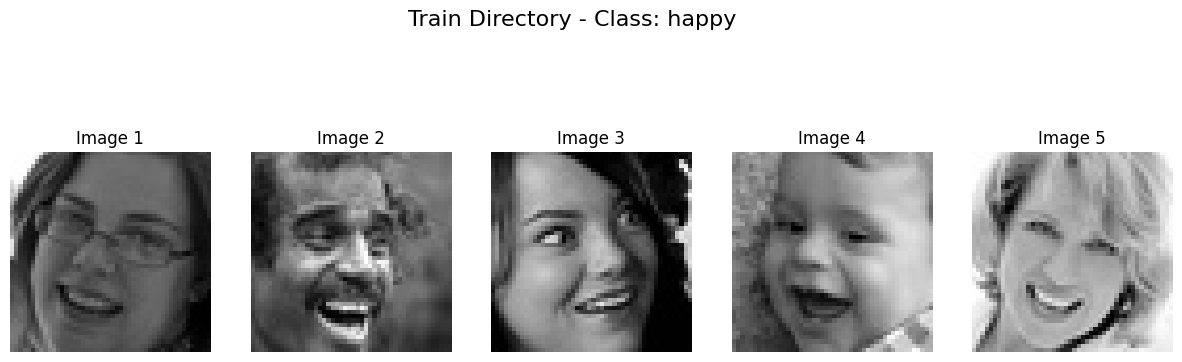

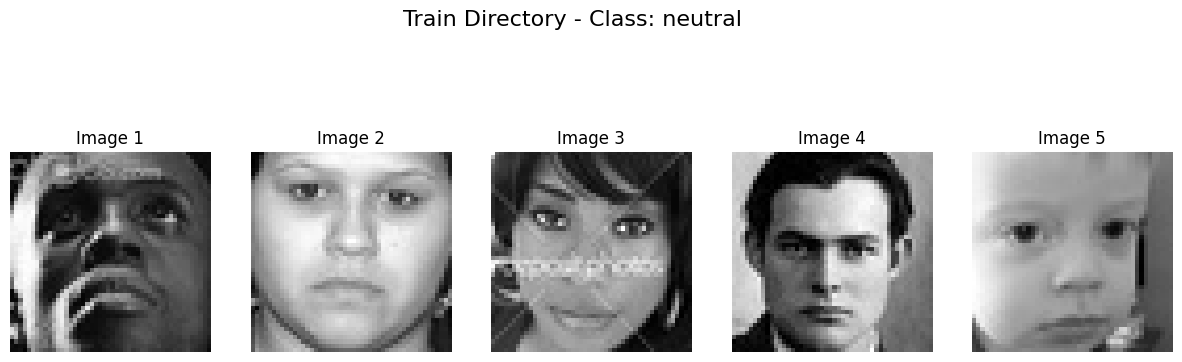

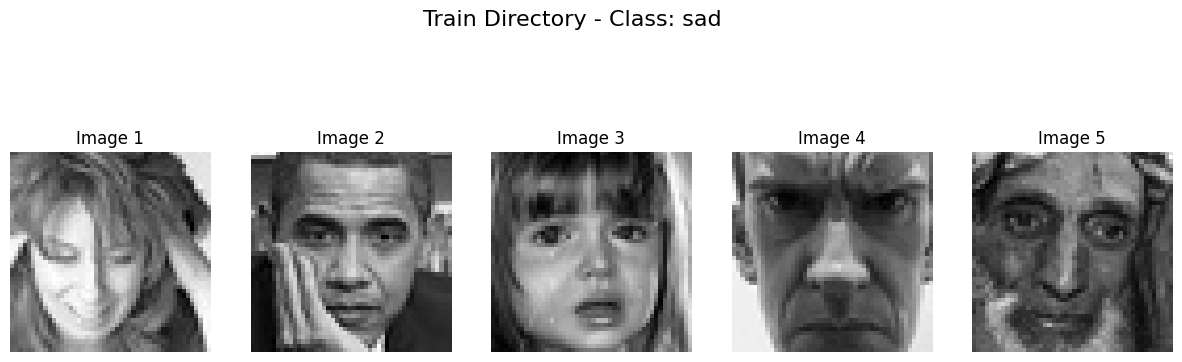

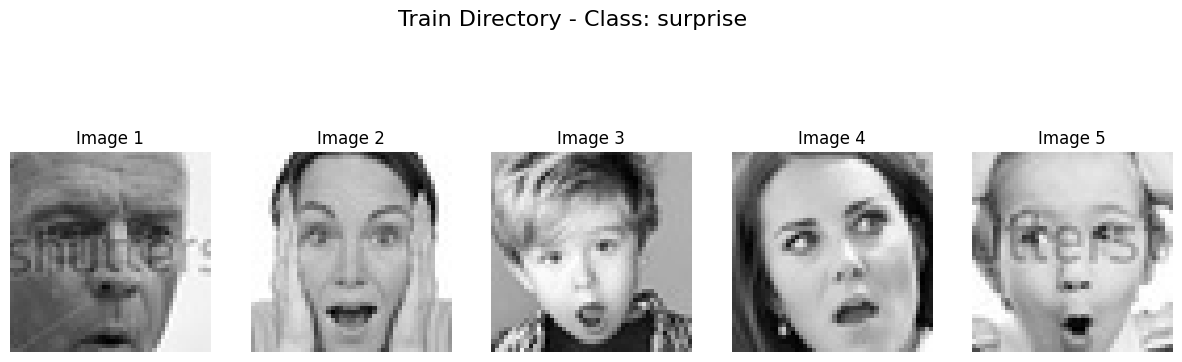

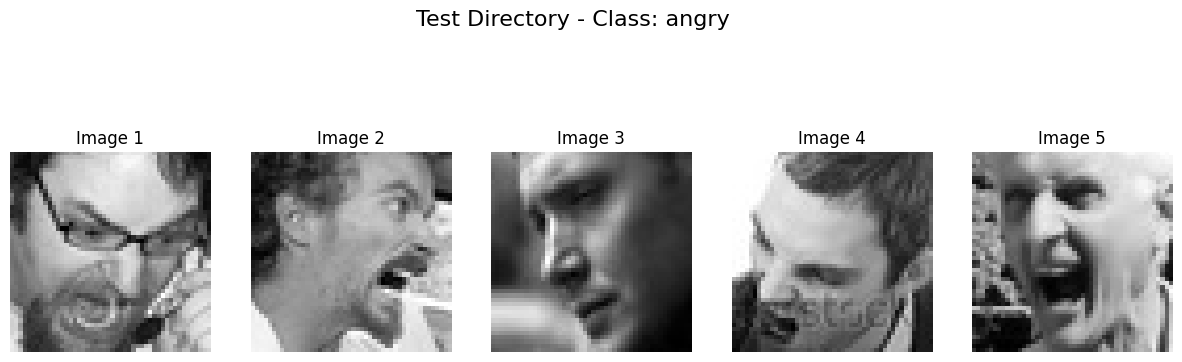

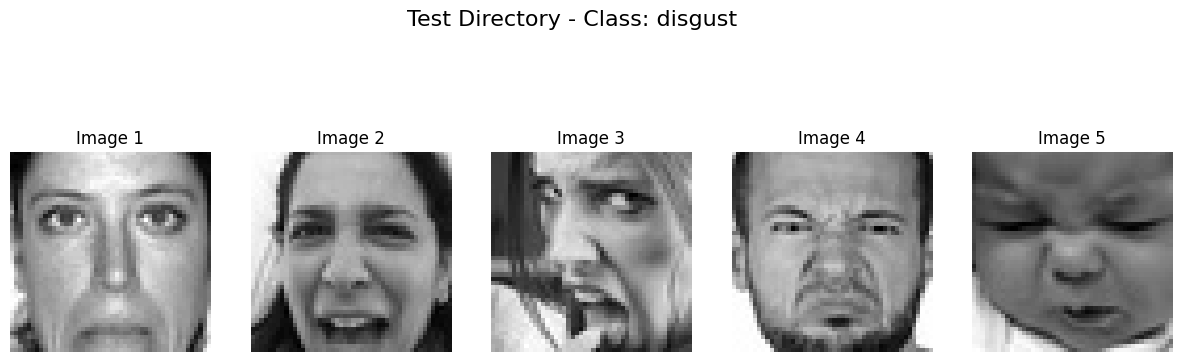

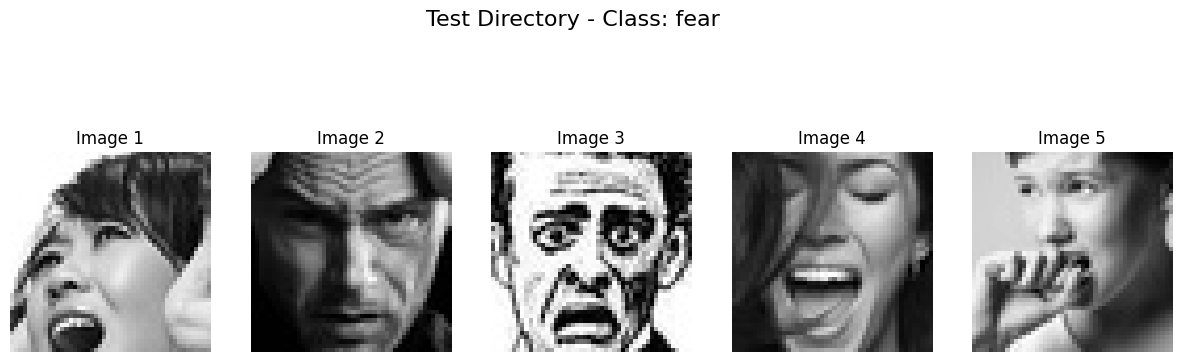

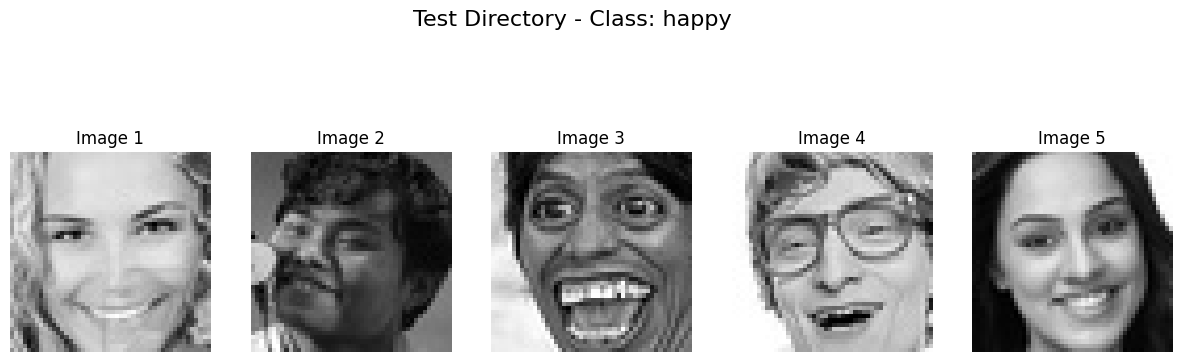

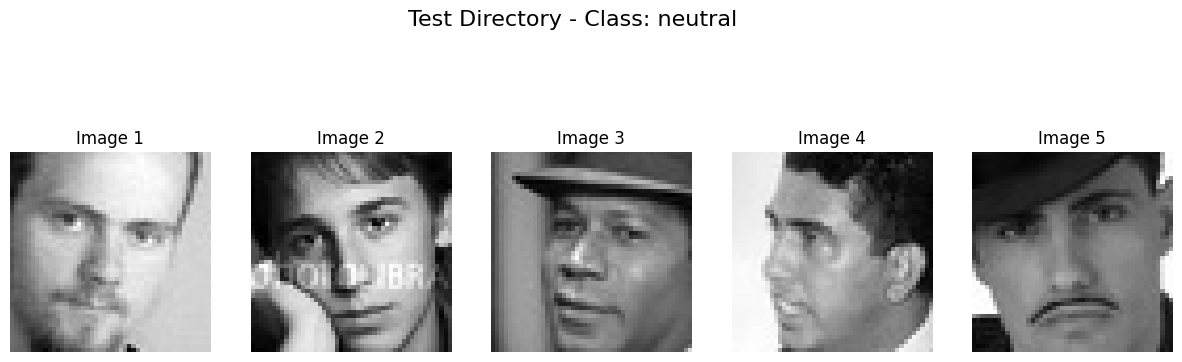

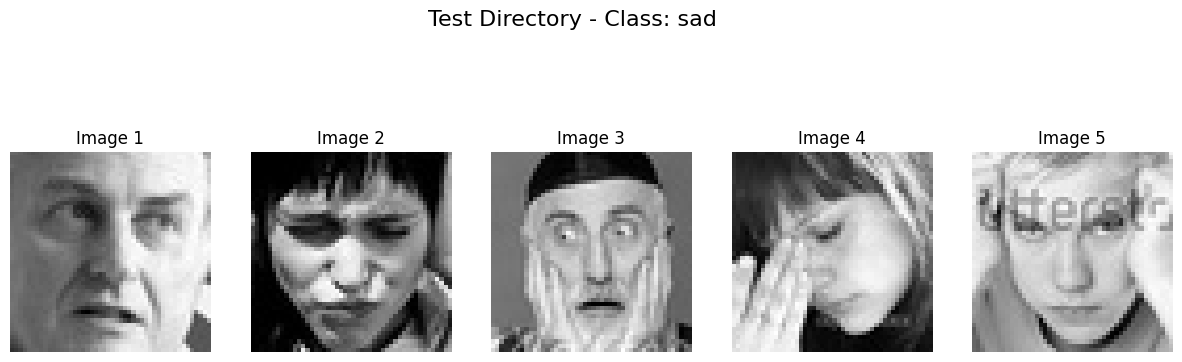

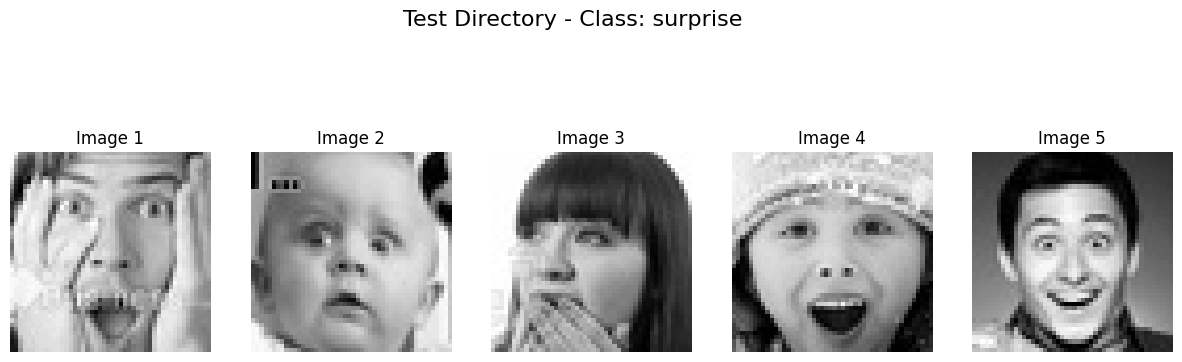

In [15]:
def display_images_from_folders(directory, title):
 
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    
    for folder in folders:
        folder_path = os.path.join(directory, folder)
        image_files = os.listdir(folder_path)[:5]  
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        fig.suptitle(f"{title} - Class: {folder}", fontsize=16)
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(image, cmap='gray')
            axes[i].axis('off')  
            axes[i].set_title(f"Image {i+1}")
        
        plt.show()

display_images_from_folders(train_dir, 'Train Directory')

display_images_from_folders(test_dir, 'Test Directory')

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


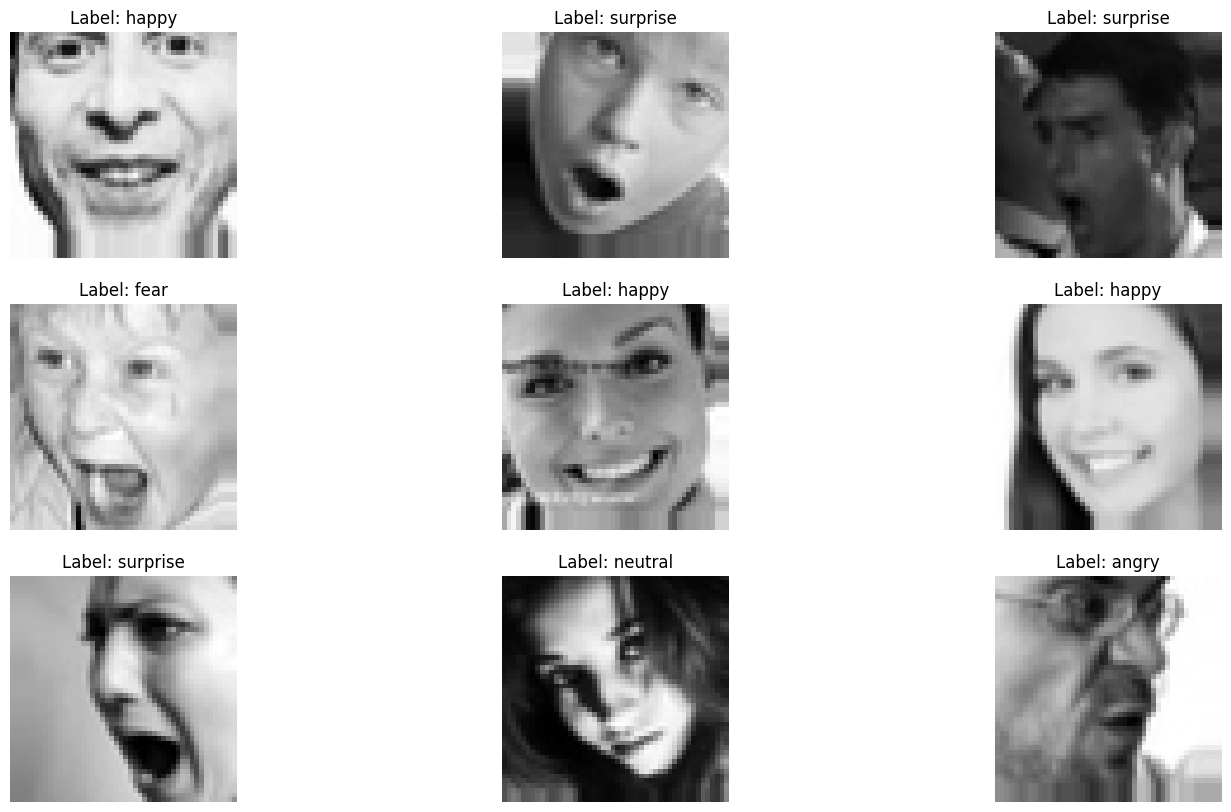

In [18]:
def visualize_samples(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(18, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i].reshape(48, 48), cmap='gray')
        label_index = np.argmax(y_batch[i])
        plt.title(f"Label: {class_names[label_index]}")
        plt.axis('off')
    plt.show()

visualize_samples(train_generator)

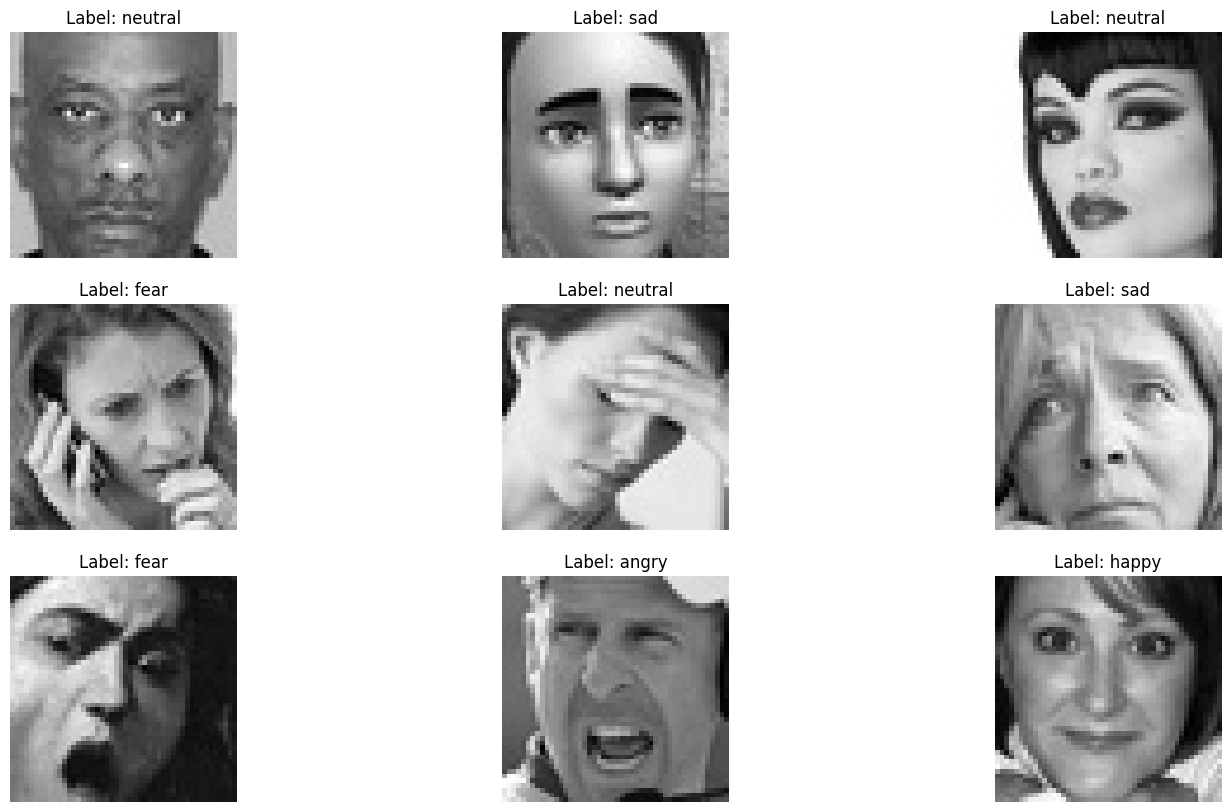

In [19]:
visualize_samples(validation_generator)

In [20]:
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [21]:
train_df

filepaths    labels
0      C:/College/Semester 5/Computer Vision/Project/...     angry
1      C:/College/Semester 5/Computer Vision/Project/...     angry
2      C:/College/Semester 5/Computer Vision/Project/...     angry
3      C:/College/Semester 5/Computer Vision/Project/...     angry
4      C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                  ...       ...
28704  C:/College/Semester 5/Computer Vision/Project/...  surprise
28705  C:/College/Semester 5/Computer Vision/Project/...  surprise
28706  C:/College/Semester 5/Computer Vision/Project/...  surprise
28707  C:/College/Semester 5/Computer Vision/Project/...  surprise
28708  C:/College/Semester 5/Computer Vision/Project/...  surprise

[28709 rows x 2 columns]

In [22]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df[['filepaths']], train_df['labels'])

balanced_train_df = pd.DataFrame({
    'filepaths': X_resampled['filepaths'],
    'labels': y_resampled
})


C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [23]:
balanced_train_df['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [24]:
balanced_train_df['labels'].value_counts()

labels
angry       7215
disgust     7215
fear        7215
happy       7215
neutral     7215
sad         7215
surprise    7215
Name: count, dtype: int64

In [25]:
balanced_train_df

filepaths    labels
0      C:/College/Semester 5/Computer Vision/Project/...     angry
1      C:/College/Semester 5/Computer Vision/Project/...     angry
2      C:/College/Semester 5/Computer Vision/Project/...     angry
3      C:/College/Semester 5/Computer Vision/Project/...     angry
4      C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                  ...       ...
50500  C:/College/Semester 5/Computer Vision/Project/...  surprise
50501  C:/College/Semester 5/Computer Vision/Project/...  surprise
50502  C:/College/Semester 5/Computer Vision/Project/...  surprise
50503  C:/College/Semester 5/Computer Vision/Project/...  surprise
50504  C:/College/Semester 5/Computer Vision/Project/...  surprise

[50505 rows x 2 columns]

In [26]:
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [27]:
ts_df

filepaths    labels
0     C:/College/Semester 5/Computer Vision/Project/...     angry
1     C:/College/Semester 5/Computer Vision/Project/...     angry
2     C:/College/Semester 5/Computer Vision/Project/...     angry
3     C:/College/Semester 5/Computer Vision/Project/...     angry
4     C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                 ...       ...
7173  C:/College/Semester 5/Computer Vision/Project/...  surprise
7174  C:/College/Semester 5/Computer Vision/Project/...  surprise
7175  C:/College/Semester 5/Computer Vision/Project/...  surprise
7176  C:/College/Semester 5/Computer Vision/Project/...  surprise
7177  C:/College/Semester 5/Computer Vision/Project/...  surprise

[7178 rows x 2 columns]

In [28]:
ts_df['labels'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [29]:
ts_df['labels'].value_counts()

labels
happy       1774
sad         1247
neutral     1233
fear        1024
angry        958
surprise     831
disgust      111
Name: count, dtype: int64

In [30]:
ros = RandomOverSampler(random_state=42)
X_resampled_ts, y_resampled_ts = ros.fit_resample(ts_df[['filepaths']], ts_df['labels'])

balanced_ts_df = pd.DataFrame({
    'filepaths': X_resampled_ts['filepaths'],
    'labels': y_resampled_ts
})


C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\sklearn\base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



In [31]:
balanced_ts_df

filepaths    labels
0      C:/College/Semester 5/Computer Vision/Project/...     angry
1      C:/College/Semester 5/Computer Vision/Project/...     angry
2      C:/College/Semester 5/Computer Vision/Project/...     angry
3      C:/College/Semester 5/Computer Vision/Project/...     angry
4      C:/College/Semester 5/Computer Vision/Project/...     angry
...                                                  ...       ...
12413  C:/College/Semester 5/Computer Vision/Project/...  surprise
12414  C:/College/Semester 5/Computer Vision/Project/...  surprise
12415  C:/College/Semester 5/Computer Vision/Project/...  surprise
12416  C:/College/Semester 5/Computer Vision/Project/...  surprise
12417  C:/College/Semester 5/Computer Vision/Project/...  surprise

[12418 rows x 2 columns]

In [32]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [33]:
valid_df, test_df = train_test_split(balanced_train_df,  train_size= 0.2, shuffle= True, random_state= 42)

In [34]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(balanced_train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe(ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 50505 validated image filenames belonging to 7 classes.
Found 10101 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


In [35]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [36]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     5

In [37]:
model.compile (Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [38]:
epochs = 15

history = model.fit(train_gen , epochs= epochs , verbose= 1, validation_data= test_gen, shuffle= False)

Epoch 1/15
3157/3157 [==============================] - 3116s 981ms/step - loss: 1.6622 - accuracy: 0.3462 - val_loss: 1.4916 - val_accuracy: 0.4117
Epoch 2/15
3157/3157 [==============================] - 470s 149ms/step - loss: 1.0643 - accuracy: 0.5937 - val_loss: 1.3203 - val_accuracy: 0.5189
Epoch 3/15
3157/3157 [==============================] - 467s 148ms/step - loss: 0.6830 - accuracy: 0.7594 - val_loss: 1.4427 - val_accuracy: 0.4873
Epoch 4/15
3157/3157 [==============================] - 467s 148ms/step - loss: 0.3641 - accuracy: 0.8812 - val_loss: 1.5587 - val_accuracy: 0.5261
Epoch 5/15
3157/3157 [==============================] - 499s 158ms/step - loss: 0.2186 - accuracy: 0.9366 - val_loss: 1.9184 - val_accuracy: 0.5294
Epoch 6/15
3157/3157 [==============================] - 470s 149ms/step - loss: 0.1509 - accuracy: 0.9581 - val_loss: 1.8707 - val_accuracy: 0.5414
Epoch 7/15
3157/3157 [==============================] - 472s 149ms/step - loss: 0.1194 - accuracy: 0.9703 - val

In [39]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

449/449 [==============================] - 20s 44ms/step - loss: 3.3799 - accuracy: 0.5344
Validation Accuracy: 53.44%


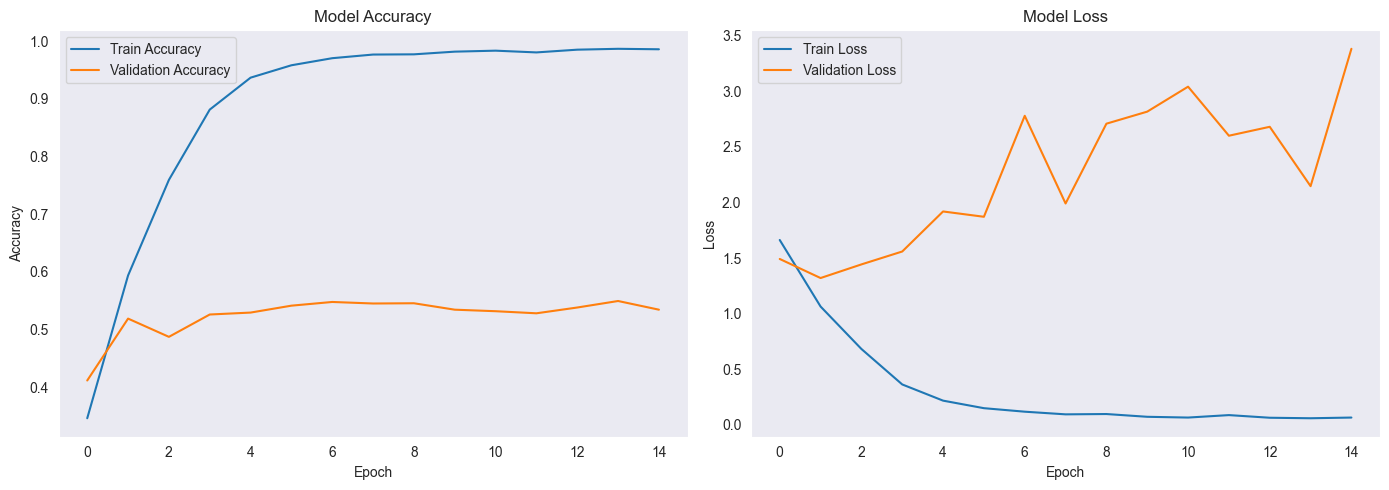

In [40]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

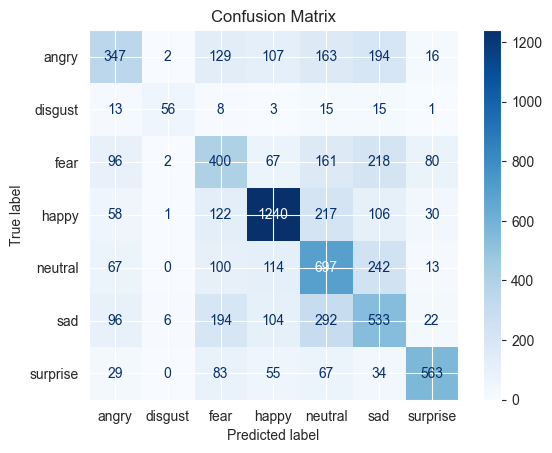

              precision    recall  f1-score   support

       angry       0.49      0.36      0.42       958
     disgust       0.84      0.50      0.63       111
        fear       0.39      0.39      0.39      1024
       happy       0.73      0.70      0.72      1774
     neutral       0.43      0.57      0.49      1233
         sad       0.40      0.43      0.41      1247
    surprise       0.78      0.68      0.72       831

    accuracy                           0.53      7178
   macro avg       0.58      0.52      0.54      7178
weighted avg       0.55      0.53      0.54      7178



In [41]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen.classes
predicted_labels = model.predict(test_gen)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())






disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen.class_indices.keys())
print(report)

In [42]:
# Save the model
model.save('sequential1_classification_emotion_detection_model.h5')

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define a ResNet block
def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [44]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
epochs = 20
history = model.fit(train_gen, epochs=epochs, verbose=1, validation_data=valid_gen, shuffle=False)

Epoch 1/20
3157/3157 [==============================] - 99s 30ms/step - loss: 1.8990 - accuracy: 0.1930 - val_loss: 1.8759 - val_accuracy: 0.2087
Epoch 2/20
3157/3157 [==============================] - 95s 30ms/step - loss: 1.7897 - accuracy: 0.2461 - val_loss: 1.7841 - val_accuracy: 0.2578
Epoch 3/20
3157/3157 [==============================] - 95s 30ms/step - loss: 1.7135 - accuracy: 0.3002 - val_loss: 1.5713 - val_accuracy: 0.3431
Epoch 4/20
3157/3157 [==============================] - 95s 30ms/step - loss: 1.5472 - accuracy: 0.3620 - val_loss: 1.3755 - val_accuracy: 0.4118
Epoch 5/20
3157/3157 [==============================] - 94s 30ms/step - loss: 1.3904 - accuracy: 0.4027 - val_loss: 1.4621 - val_accuracy: 0.3721
Epoch 6/20
3157/3157 [==============================] - 95s 30ms/step - loss: 1.3525 - accuracy: 0.4157 - val_loss: 1.2629 - val_accuracy: 0.4451
Epoch 7/20
3157/3157 [==============================] - 94s 30ms/step - loss: 1.2999 - accuracy: 0.4433 - val_loss: 1.3320 -

In [46]:
test_gen_new = ts_gen.flow_from_dataframe(balanced_ts_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 12418 validated image filenames belonging to 7 classes.


In [47]:
loss, accuracy = model.evaluate(test_gen)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

449/449 [==============================] - 5s 11ms/step - loss: 1.9139 - accuracy: 0.3575
Validation Accuracy: 35.75%


In [48]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

777/777 [==============================] - 8s 10ms/step - loss: 2.1035 - accuracy: 0.3796
Validation Accuracy: 37.96%


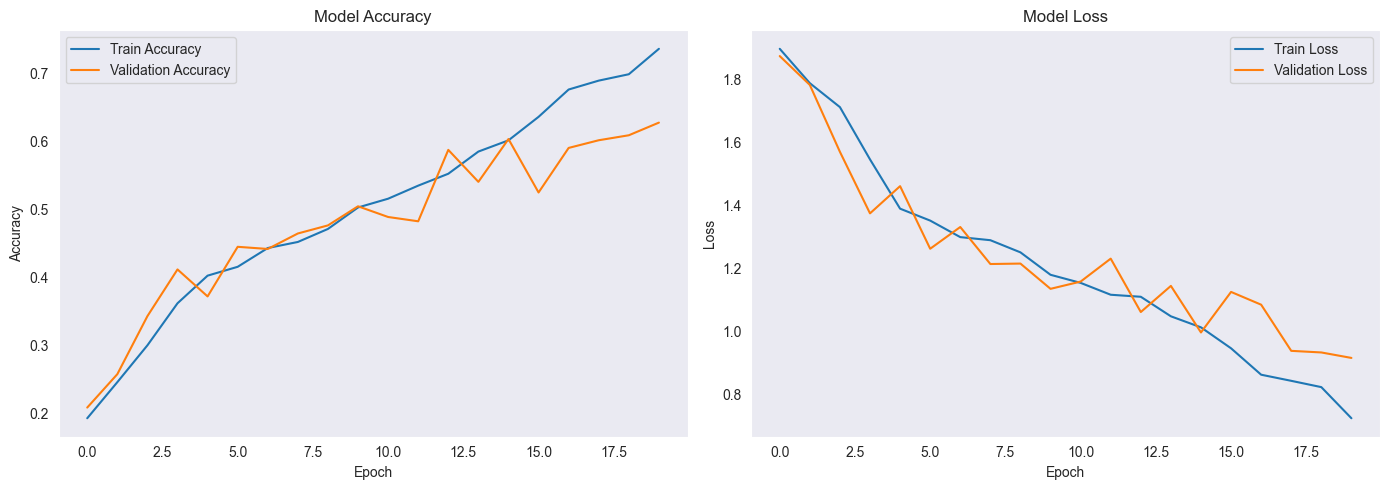

In [49]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

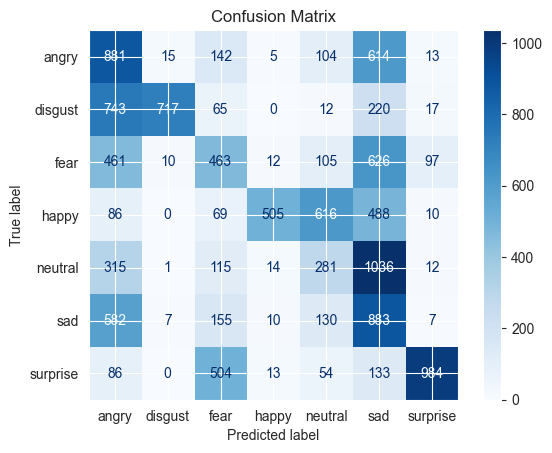

              precision    recall  f1-score   support

       angry       0.28      0.50      0.36      1774
     disgust       0.96      0.40      0.57      1774
        fear       0.31      0.26      0.28      1774
       happy       0.90      0.28      0.43      1774
     neutral       0.22      0.16      0.18      1774
         sad       0.22      0.50      0.31      1774
    surprise       0.86      0.55      0.68      1774

    accuracy                           0.38     12418
   macro avg       0.53      0.38      0.40     12418
weighted avg       0.53      0.38      0.40     12418



In [50]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [51]:
# Save the model
model.save('resnet1_classification_emotion_detection_model.h5')

In [58]:
train_df_new, temp_df_new = train_test_split(
    balanced_train_df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=balanced_train_df['labels']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['labels'] 
)

In [59]:
batch_size = 16
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen_new = tr_gen.flow_from_dataframe(train_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

valid_gen_new = ts_gen.flow_from_dataframe(valid_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                     color_mode= 'grayscale', shuffle= True, batch_size= batch_size)

test_gen_new = ts_gen.flow_from_dataframe(test_df_new, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'sparse',
                                    color_mode= 'grayscale', shuffle= False, batch_size= batch_size)

Found 40404 validated image filenames belonging to 7 classes.
Found 5050 validated image filenames belonging to 7 classes.
Found 5051 validated image filenames belonging to 7 classes.


In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Add, Flatten, Dense, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def resnet_block(inputs, filters, kernel_size=(3, 3), stride=1):
    # First Conv Layer
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second Conv Layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Add the shortcut (skip connection)
    shortcut = inputs
    if stride != 1 or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Input shape
input_shape = (224, 224, 1)  # Grayscale images
inputs = Input(shape=input_shape)

# Initial Conv Layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Residual Blocks (ResNet Blocks)
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=128, stride=2)
x = resnet_block(x, filters=256, stride=2)
x = resnet_block(x, filters=512, stride=2)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)  # Dropout layer
outputs = Dense(7, activation="softmax")(x)  # 7 output classes

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [61]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
epochs = 35
history = model.fit(train_gen_new, epochs=epochs, verbose=1, validation_data=valid_gen_new, shuffle=False)

Epoch 1/35
2526/2526 [==============================] - 98s 38ms/step - loss: 1.8822 - accuracy: 0.2252 - val_loss: 1.7295 - val_accuracy: 0.3053
Epoch 2/35
2526/2526 [==============================] - 349s 138ms/step - loss: 1.6825 - accuracy: 0.3284 - val_loss: 1.5885 - val_accuracy: 0.3495
Epoch 3/35
2526/2526 [==============================] - 400s 158ms/step - loss: 1.5147 - accuracy: 0.3832 - val_loss: 1.7137 - val_accuracy: 0.3194
Epoch 4/35
2526/2526 [==============================] - 199s 79ms/step - loss: 1.4334 - accuracy: 0.4105 - val_loss: 1.3912 - val_accuracy: 0.4212
Epoch 5/35
2526/2526 [==============================] - 74s 29ms/step - loss: 1.3485 - accuracy: 0.4462 - val_loss: 1.3340 - val_accuracy: 0.4442
Epoch 6/35
2526/2526 [==============================] - 74s 29ms/step - loss: 1.2889 - accuracy: 0.4733 - val_loss: 1.2787 - val_accuracy: 0.4695
Epoch 7/35
2526/2526 [==============================] - 74s 29ms/step - loss: 1.2727 - accuracy: 0.4809 - val_loss: 1.3

In [64]:
model.save('resnet2_classification_emotion_detection_model.h5')

In [65]:
loss, accuracy = model.evaluate(test_gen_new)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

316/316 [==============================] - 16s 50ms/step - loss: 1.2775 - accuracy: 0.7197
Test Accuracy: 71.97%


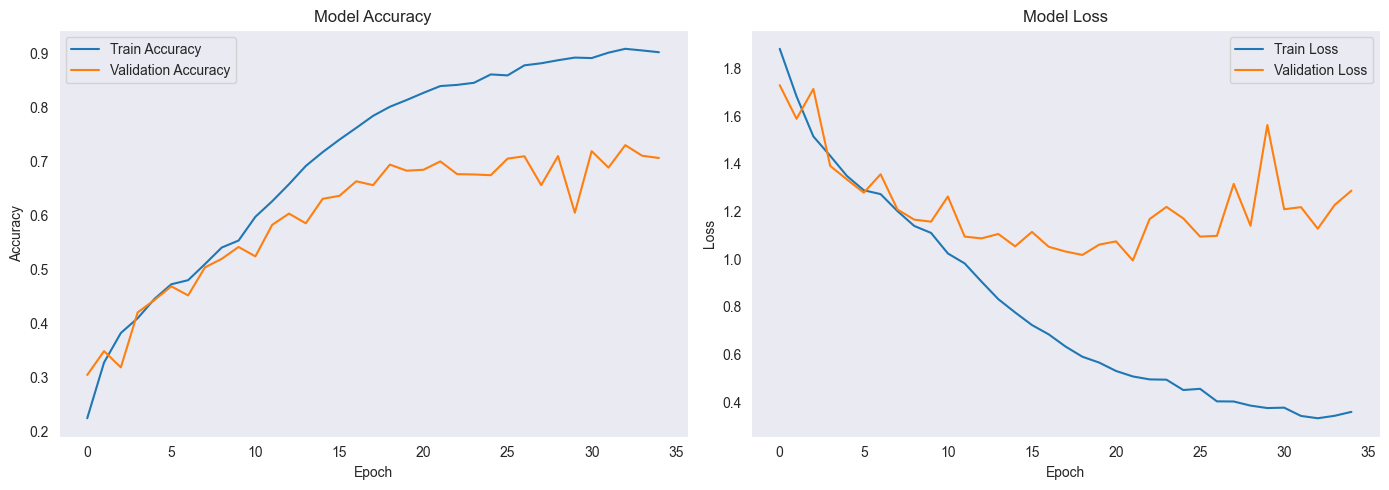

In [66]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

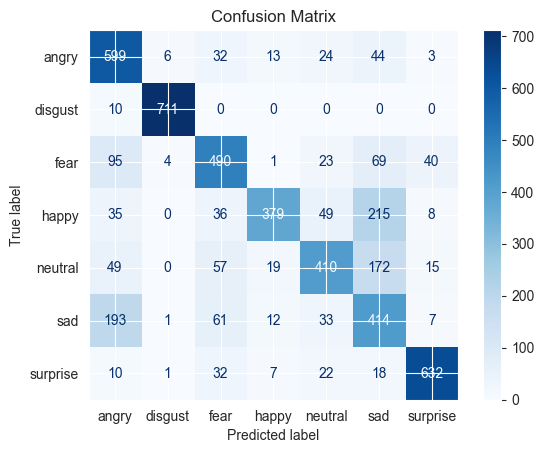

              precision    recall  f1-score   support

       angry       0.60      0.83      0.70       721
     disgust       0.98      0.99      0.98       721
        fear       0.69      0.68      0.69       722
       happy       0.88      0.52      0.66       722
     neutral       0.73      0.57      0.64       722
         sad       0.44      0.57      0.50       721
    surprise       0.90      0.88      0.89       722

    accuracy                           0.72      5051
   macro avg       0.75      0.72      0.72      5051
weighted avg       0.75      0.72      0.72      5051



In [67]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [59]:
img_size = (224, 224)
channels = 1
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  
    
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), 
    
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
       
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_29 (Batc (None, 112, 112, 128)    

In [60]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Save the model
model.save('sequential2_classification _emotion_detection_model.h5')

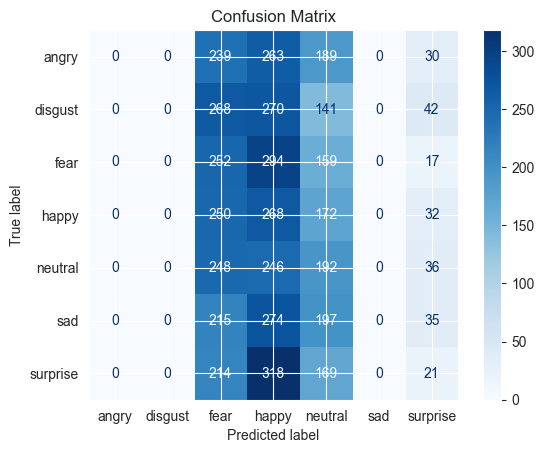

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       721
     disgust       0.00      0.00      0.00       721
        fear       0.15      0.35      0.21       722
       happy       0.14      0.37      0.20       722
     neutral       0.16      0.27      0.20       722
         sad       0.00      0.00      0.00       721
    surprise       0.10      0.03      0.04       722

    accuracy                           0.15      5051
   macro avg       0.08      0.15      0.09      5051
weighted avg       0.08      0.15      0.09      5051



In [61]:
true_labels = test_gen_new.classes
predicted_labels = model.predict(test_gen_new)
predicted_labels = np.argmax(predicted_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=test_gen_new.class_indices.keys())
print(report)

In [78]:
# Save the model
model.save('new_classification _emotion_detection_model.h5')

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
batch_normalization_29 (Batc (None, 112, 112, 128)    

In [80]:
import cv2
import numpy as np

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize camera
cap = cv2.VideoCapture(0)

# Emotion labels corresponding to model's output classes
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Assuming model is already loaded, e.g., model = tf.keras.models.load_model('path_to_model')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]  # Crop the face region
        
        # Ensure face is resized properly to match the input size expected by the model
        face = cv2.resize(face, (48, 48))  # Resize to 48x48 or another size expected by your model
        
        # Normalize the pixel values to [0, 1]
        face = face / 255.0
        
        # Add channel and batch dimensions for grayscale (single channel)
        face = np.expand_dims(face, axis=-1)  # Add channel dimension (for grayscale, 1 channel)
        face = np.expand_dims(face, axis=0)  # Add batch dimension (for single image)
        
        # Predict emotion
        predictions = model.predict(face)
        emotion = emotion_labels[np.argmax(predictions[0])]

        # Draw bounding box and label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame with predicted emotion
    cv2.imshow('Classification Emotion Recognitional', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ValueError: in user code:

    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\abdur\anaconda3\envs\tf-env\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_35 is incompatible with the layer: expected axis -1 of input shape to have value 100352 but received input with shape (None, 4608)


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
##model = tf.keras.models.load_model('new_classsification_emotion_detection_model.h5')  # Adjust the path if necessary

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']  # Adjust if you have different labels

# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 for the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale and resize for model input
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (48, 48))  # Ensure this matches your model's input size
    face = face / 255.0  # Normalize
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)

    # Predict emotion
    predictions = model.predict(face)
    max_index = np.argmax(predictions[0])
    emotion = emotion_labels[max_index]

    # Display the resulting frame
    cv2.putText(frame, f'Emotion: {emotion}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow('Classification Emotional Detection', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()
